This code serves for the 4th homework in Computational Neuroscicence taught by Xiao-Jing Wang in Fall 2022 semester. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Set up auxiliary functions

In [101]:
# Define Numerical Method 

def onestep_euler(odefun, t, y, dt, rflag=0):
    '''
    Define One Step Forward Euler Method
    '''
    y_n = y + dt * odefun(t,y,rflag)
    t_n = t + dt
    return [t_n, y_n]

def fw_euler(odefun, tspan, y0, dt, rflag):
    '''
    Define the complete Forward Euler Method
    '''
    t0,tM = tspan
    epsilon = 1e-4 * dt
    M = int(np.round((tM - t0)/dt))
    [n,mm] = np.shape(y0)
    y = y0
    t = t0
    tlst = np.array(range(M+1)) * dt + t0
    ylst = np.zeros([n, M+1])
    ylst[:, 0:1] = y0
    for k in range(1, M+1):
        [t_n, y_n] = onestep_euler(odefun, t, y, dt, rflag)
        ylst[:, k:(k+1)] = y_n
        if np.sum(np.abs(y_n - y)) < epsilon * n:
            print(t_n)
            break
        y = y_n
        t = t_n
    tlst = tlst[0:(k+1)]
    ylst = ylst[:,0:(k+1)]
    return [tlst, ylst]

In [102]:
# Define the physical calculation of physical quantities

def rec_strength(theta):
    theta = theta.reshape([-1, 1])
    C = np.cos(2 * (theta - theta.T))
    return C

def thalamic(theta, A, c, epsilon, theta_cue):
    return A*c*(1-epsilon+epsilon*np.cos(2*(theta-theta_cue)))

In [103]:
# Define the simulation of model

def model_simulation(tspan, dt, N, tau, J0, J2, A, c, epsilon, theta_cue, a, theta_0, rflag, sigma_h):
    thetalst = np.arange(1, N+1, 1) * (np.pi / N) - np.pi/2
    thetalst = thetalst.reshape(-1,1)
    C = rec_strength(thetalst)
    hlst = thalamic(thetalst, A, c, epsilon, theta_cue)

    def rsolver(t, r, rflag = 0):
        r = r.reshape([-1,1])
        if rflag == 1:
            hlst_t = hlst + sigma_h * np.random.randn(N,1)
        else:
            hlst_t = hlst
        return (-r + np.maximum(hlst_t + J0 * np.sum(r) / N + J2 * np.matmul(C, r) / N, 0)) / tau

    r0 = a * np.cos(2*(thetalst - theta_0))
    [tlst,rlst] = fw_euler(rsolver, tspan, r0, dt, rflag)
    return [thetalst, tlst, rlst]


### Start the actual experiment

STOP at: 130.57000000002623
STOP at: 134.06000000002305
STOP at: 141.78000000001603
STOP at: 153.28000000000557


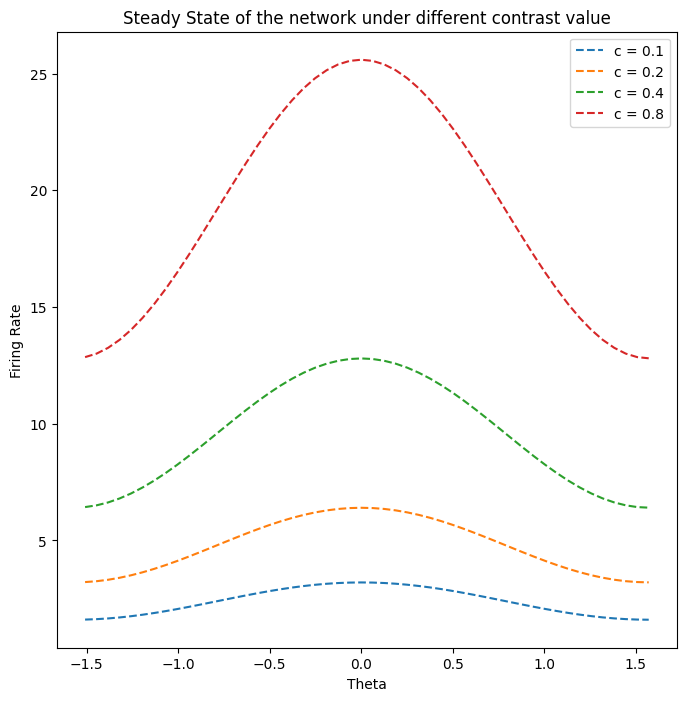

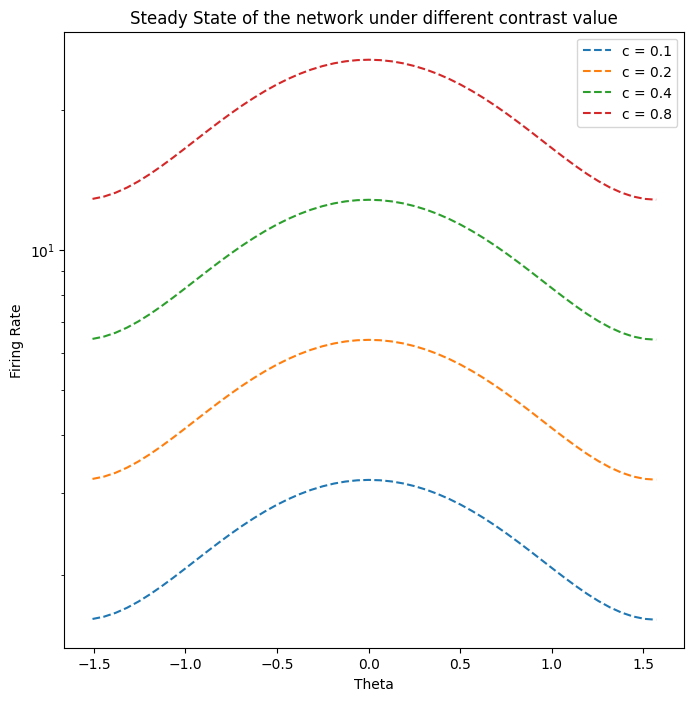

In [104]:
# Experiment 1

tau, N = 10, 50
J0, J2 = -0.5, 1
A, c, epsilon, theta_cue = 40, 0.8, 0.1, 0
random_flag, sigma_h = 0, 3

a = 2 
theta_0 = np.pi/4

t_span = [0, 10000]
dt = 0.01

clst = [0.1, 0.2, 0.4, 0.8]
legend_lst = [f'c = {i}' for i in clst]
r_ss_lst = np.zeros([N, 4])
r_ratio_lst = np.zeros([N, 4])

for i in range(len(clst)):
    c = clst[i]
    [theta_lst, t_lst, r_lst] = model_simulation(t_span, dt, N, tau, J0, J2, A, c, epsilon, theta_cue, a, theta_0, random_flag, sigma_h)

    r_ss = r_lst[:, -1].reshape([-1, 1])
    r_ratio = r_ss / thalamic(theta_lst, A, c, epsilon, theta_cue)

    r_ss_lst[:, i] = r_ss.squeeze()
    r_ratio_lst[:, i] = r_ratio.squeeze()

plt.figure(1,figsize=(8,8))
plt.plot(theta_lst,r_ss_lst,'--')
plt.xlabel('Theta')
plt.ylabel('Firing Rate')
plt.title('Steady State of the network under different contrast value')
plt.legend(legend_lst)

plt.figure(2,figsize=(8,8))
plt.semilogy(theta_lst,r_ss_lst,'--')
plt.xlabel('Theta')
plt.ylabel('Firing Rate')
plt.title('Steady State of the network under different contrast value')
plt.legend(legend_lst)



STOP at: 1999.6299999983264
STOP at: 2169.5800000009363
STOP at: 2323.2100000042897
STOP at: 2437.070000006775


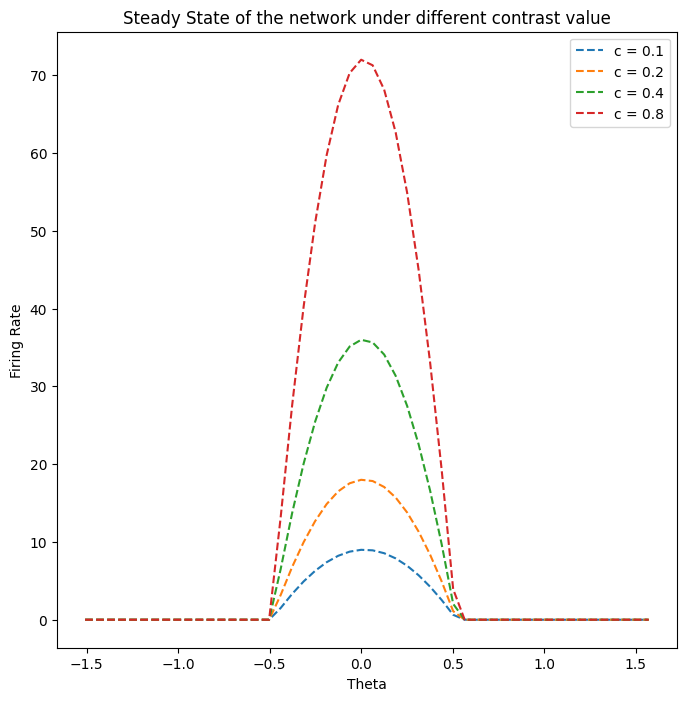

In [111]:
# Experiment 2

tau, N = 10, 50
J0, J2 = -7.3, 11
A, c, epsilon, theta_cue = 40, 0.8, 0.1, 0
random_flag, sigma_h = 0, 3

a = 2
theta_0 = np.pi/4

t_span = [0, 10000]
dt = 0.01

clst = [0.1, 0.2, 0.4, 0.8]
legend_lst = [f'c = {i}' for i in clst]
r_ss_lst = np.zeros([N, 4])
r_ratio_lst = np.zeros([N, 4])

for i in range(len(clst)):
    c = clst[i]
    [theta_lst, t_lst, r_lst] = model_simulation(t_span, dt, N, tau, J0, J2, A, c, epsilon, theta_cue, a, theta_0, random_flag, sigma_h)

    r_ss = r_lst[:, -1].reshape([-1, 1])
    r_ratio = r_ss / thalamic(theta_lst, A, c, epsilon, theta_cue)

    r_ss_lst[:, i] = r_ss.squeeze()
    r_ratio_lst[:, i] = r_ratio.squeeze()

plt.figure(3,figsize=(8,8))
plt.plot(theta_lst,r_ss_lst,'--')
plt.xlabel('Theta')
plt.ylabel('Firing Rate')
plt.title('Steady State of the network under different contrast value')
plt.legend(legend_lst)



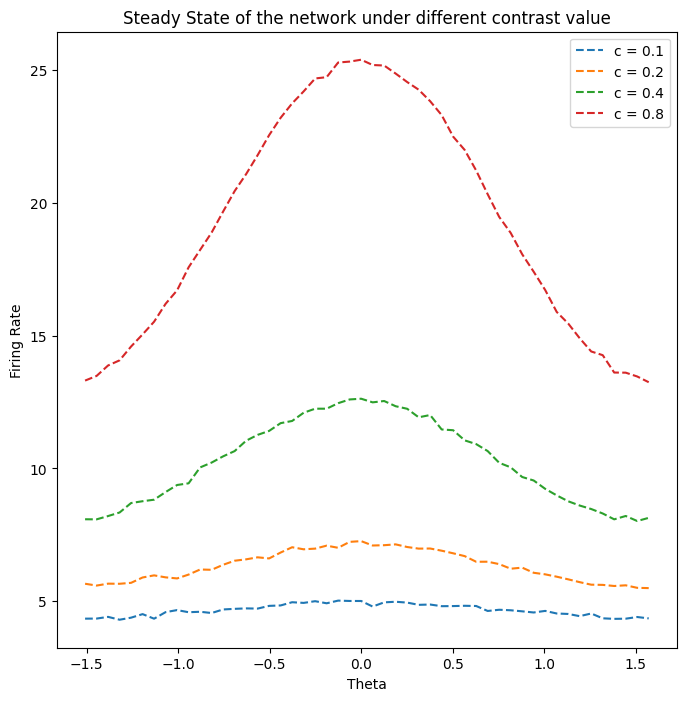

In [117]:
# Experiment 3.1.1, noise level is fixed, with different contrast

tau, N = 10, 50
J0, J2 = -0.5, 1
A, c, epsilon, theta_cue = 40, 0.8, 0.1, 0
random_flag, sigma_h = 1, 10

a = 2 
theta_0 = np.pi/4

t_span = [0, 10000]
dt = 0.01

clst = [0.1, 0.2, 0.4, 0.8]
legend_lst = [f'c = {i}' for i in clst]
r_ss_lst = np.zeros([N, 4])
r_ratio_lst = np.zeros([N, 4])

for i in range(len(clst)):
    c = clst[i]
    [theta_lst, t_lst, r_lst] = model_simulation(t_span, dt, N, tau, J0, J2, A, c, epsilon, theta_cue, a, theta_0, random_flag, sigma_h)

    # r_ss = r_lst[:, -1].reshape([-1, 1])
    r_ss = np.mean(r_lst[:,-10000:-1],axis = 1).reshape([-1,1])
    r_ratio = r_ss / thalamic(theta_lst, A, c, epsilon, theta_cue)

    r_ss_lst[:, i] = r_ss.squeeze()
    r_ratio_lst[:, i] = r_ratio.squeeze()

plt.figure(4,figsize=(8,8))
plt.plot(theta_lst,r_ss_lst,'--')
plt.xlabel('Theta')
plt.ylabel('Firing Rate')
plt.title('Steady State of the network under different contrast value')
plt.legend(legend_lst)




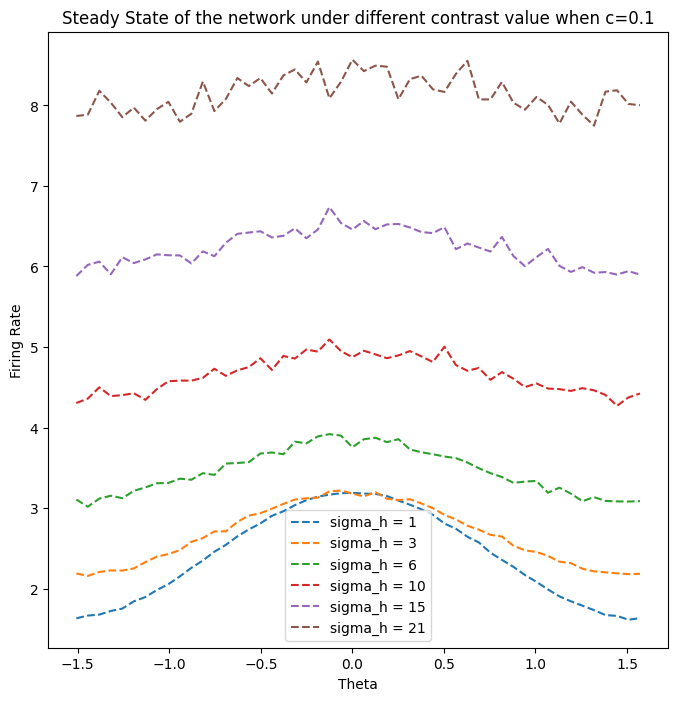

In [118]:
# Experiment 3.1.2, contrast level is fixed, with different noise level

tau, N = 10, 50
J0, J2 = -0.5, 1
A, c, epsilon, theta_cue = 40, 0.1, 0.1, 0
random_flag, sigma_h = 1, 10

a = 2 
theta_0 = np.pi/4

t_span = [0, 10000]
dt = 0.01

sigma_h_lst = [1,3,6,10,15,21]
legend_lst = [f'sigma_h = {i}' for i in sigma_h_lst]
r_ss_lst = np.zeros([N, 6])
r_ratio_lst = np.zeros([N, 6])

for i in range(len(sigma_h_lst)):
    sigma_h = sigma_h_lst[i]
    [theta_lst, t_lst, r_lst] = model_simulation(t_span, dt, N, tau, J0, J2, A, c, epsilon, theta_cue, a, theta_0, random_flag, sigma_h)

    # r_ss = r_lst[:, -1].reshape([-1, 1])
    r_ss = np.mean(r_lst[:,-10000:-1],axis = 1).reshape([-1,1])
    r_ratio = r_ss / thalamic(theta_lst, A, c, epsilon, theta_cue)

    r_ss_lst[:, i] = r_ss.squeeze()
    r_ratio_lst[:, i] = r_ratio.squeeze()

plt.figure(5,figsize=(8,8))
plt.plot(theta_lst,r_ss_lst,'--')
plt.xlabel('Theta')
plt.ylabel('Firing Rate')
plt.title(f'Steady State of the network under different contrast value when c={c}')
plt.legend(legend_lst)


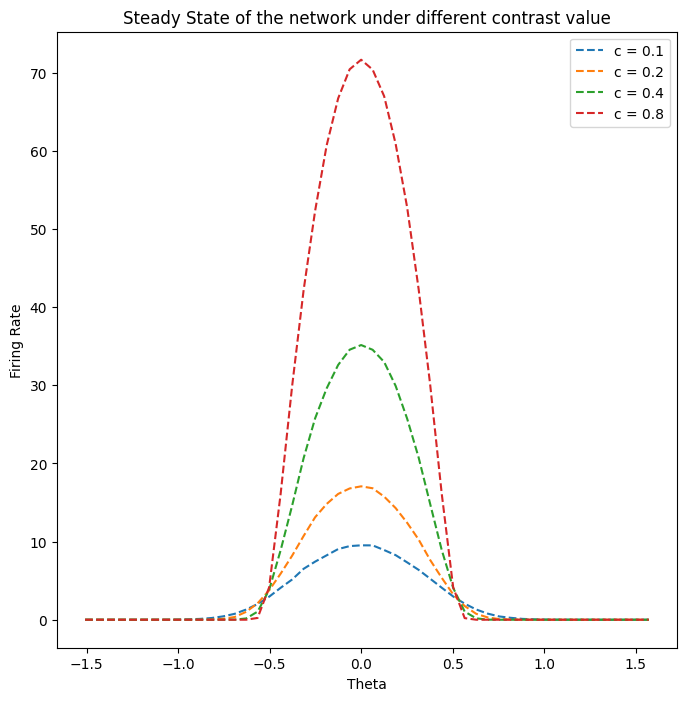

In [119]:
# Experiment 3.2.1, noise level is fixed, with different contrast

tau, N = 10, 50
J0, J2 = -7.3, 11
A, c, epsilon, theta_cue = 40, 0.8, 0.1, 0
random_flag, sigma_h = 1, 10

a = 2 
theta_0 = np.pi/4

t_span = [0, 10000]
dt = 0.01

clst = [0.1, 0.2, 0.4, 0.8]
legend_lst = [f'c = {i}' for i in clst]
r_ss_lst = np.zeros([N, 4])
r_ratio_lst = np.zeros([N, 4])

for i in range(len(clst)):
    c = clst[i]
    [theta_lst, t_lst, r_lst] = model_simulation(t_span, dt, N, tau, J0, J2, A, c, epsilon, theta_cue, a, theta_0, random_flag, sigma_h)

    # r_ss = r_lst[:, -1].reshape([-1, 1])
    r_ss = np.mean(r_lst[:,-10000:-1],axis = 1).reshape([-1,1])
    r_ratio = r_ss / thalamic(theta_lst, A, c, epsilon, theta_cue)

    r_ss_lst[:, i] = r_ss.squeeze()
    r_ratio_lst[:, i] = r_ratio.squeeze()

plt.figure(6,figsize=(8,8))
plt.plot(theta_lst,r_ss_lst,'--')
plt.xlabel('Theta')
plt.ylabel('Firing Rate')
plt.title('Steady State of the network under different contrast value')
plt.legend(legend_lst)




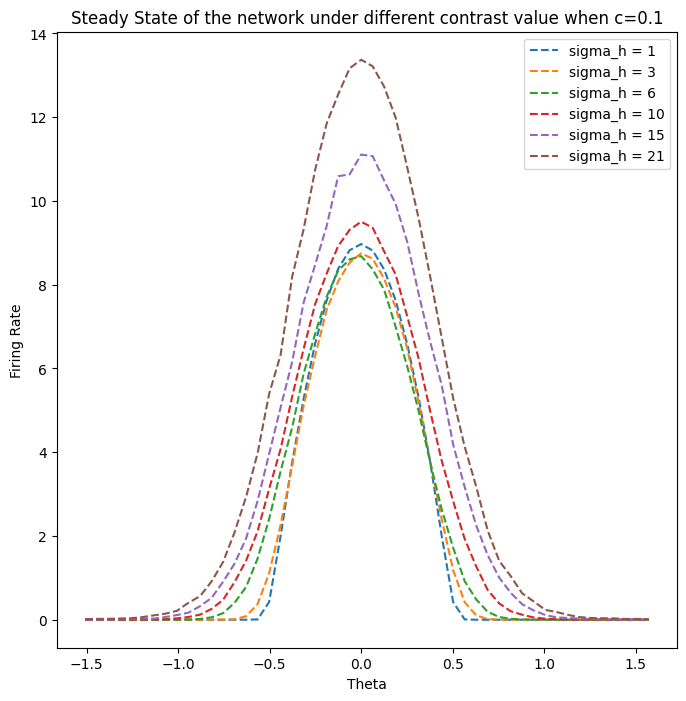

In [120]:
# Experiment 3.2.2, contrast level is fixed, with different noise level

tau, N = 10, 50
J0, J2 = -7.3, 11
A, c, epsilon, theta_cue = 40, 0.1, 0.1, 0
random_flag, sigma_h = 1, 10

a = 2 
theta_0 = np.pi/4

t_span = [0, 10000]
dt = 0.01

sigma_h_lst = [1,3,6,10,15,21]
legend_lst = [f'sigma_h = {i}' for i in sigma_h_lst]
r_ss_lst = np.zeros([N, 6])
r_ratio_lst = np.zeros([N, 6])

for i in range(len(sigma_h_lst)):
    sigma_h = sigma_h_lst[i]
    [theta_lst, t_lst, r_lst] = model_simulation(t_span, dt, N, tau, J0, J2, A, c, epsilon, theta_cue, a, theta_0, random_flag, sigma_h)

    # r_ss = r_lst[:, -1].reshape([-1, 1])
    r_ss = np.mean(r_lst[:,-10000:-1],axis = 1).reshape([-1,1])
    r_ratio = r_ss / thalamic(theta_lst, A, c, epsilon, theta_cue)

    r_ss_lst[:, i] = r_ss.squeeze()
    r_ratio_lst[:, i] = r_ratio.squeeze()

plt.figure(7,figsize=(8,8))
plt.plot(theta_lst,r_ss_lst,'--')
plt.xlabel('Theta')
plt.ylabel('Firing Rate')
plt.title(f'Steady State of the network under different contrast value when c={c}')
plt.legend(legend_lst)


STOP at: 129.12000000002755
STOP at: 230.5299999999353
STOP at: 160.87999999999866
STOP at: 321.4099999998527


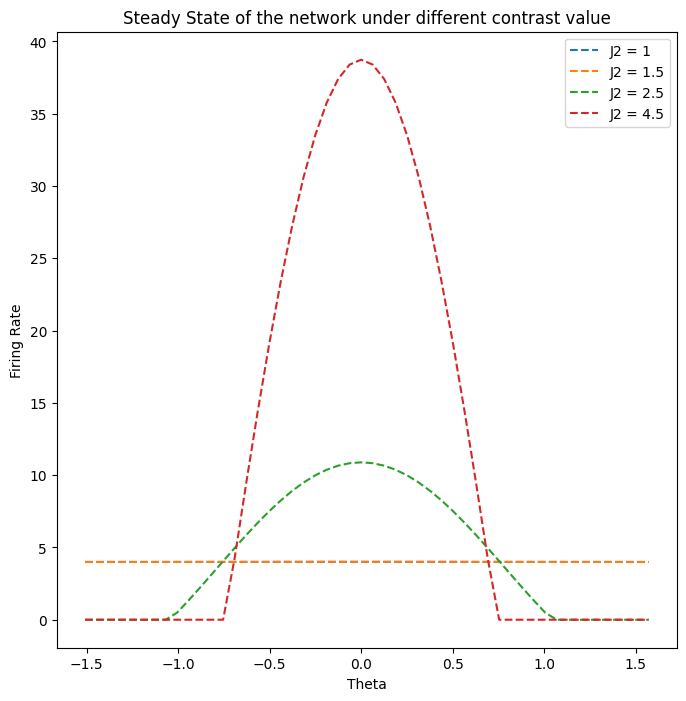

In [133]:
# Experiment 4, fix J0, set epsilon=0, and 

tau, N = 10, 50
J0, J2 = -1, 1
A, c, epsilon, theta_cue = 40, 0.2, 0, 0
random_flag, sigma_h = 0, 3

a = 2
theta_0 = 0

t_span = [0, 10000]
dt = 0.01

J2_lst = [1,1.5,2.5,4.5]
legend_lst = [f'J2 = {i}' for i in J2_lst]
r_ss_lst = np.zeros([N, 4])
r_ratio_lst = np.zeros([N, 4])

for i in range(len(clst)):
    J2 = J2_lst[i]
    [theta_lst, t_lst, r_lst] = model_simulation(t_span, dt, N, tau, J0, J2, A, c, epsilon, theta_cue, a, theta_0, random_flag, sigma_h)

    r_ss = r_lst[:, -1].reshape([-1, 1])
    r_ratio = r_ss / thalamic(theta_lst, A, c, epsilon, theta_cue)

    r_ss_lst[:, i] = r_ss.squeeze()
    r_ratio_lst[:, i] = r_ratio.squeeze()

plt.figure(8,figsize=(8,8))
plt.plot(theta_lst,r_ss_lst,'--')
plt.xlabel('Theta')
plt.ylabel('Firing Rate')
plt.title('Steady State of the network under different contrast value')
plt.legend(legend_lst)


